# Celem analizy jest predykcja kosztu ubezpieczenia dla nowych klientów


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/insurance.csv')

## Analiza wstępna

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Wnioski ze wstępnej analizy
Mamy 1338 rekordów, dane są kompletne. Średnia wieku to 39,2 lat. Średnia cena ubezpieczenia to 13270.4.


## Analiza szczegółowa
Sprawdzimy jak dane prezentoją się na histogramach.

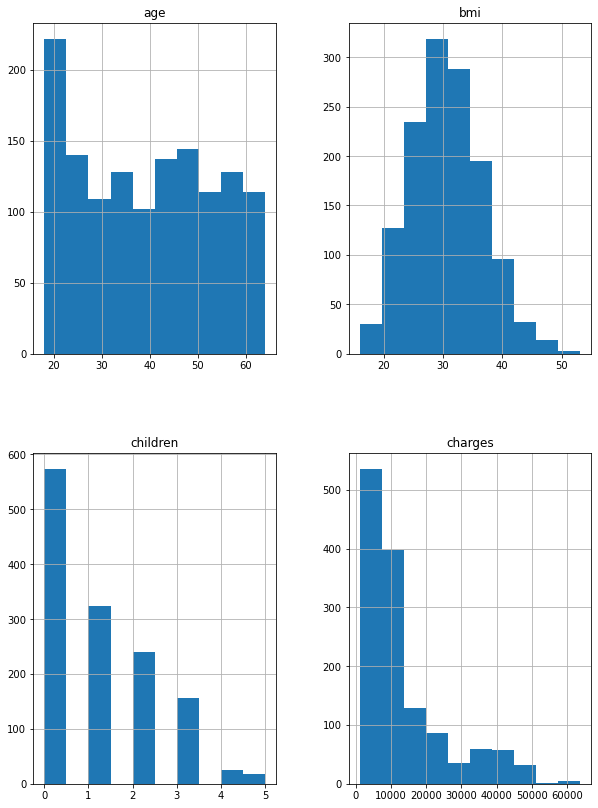

In [15]:
df.hist(figsize=(10,14));

Największą grupę stanowią młode osoby (ok. 20 lat). Prawidłowe bmi wynosi od 18,5 do 24,99. Ze wstępnej analizy wiemy że średnia BMI wychodzi 30.7, a histogram potwierdza, że BMI jest zbyt wysokie dla większości badanych. Ma to potencjalny wpływ na stan zdrowia, a więc i ubezpieczenie. Większość badanych nie posiada dzieci, a stawka ubezpieczenia mieści się w okolicach średniej. 
Stworzymy wartości dla kolumn kategorycznych

In [42]:
df['sex'].value_counts()


male      676
female    662
Name: sex, dtype: int64

In [43]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [44]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Mamy 676 mężczyzn i 662 kobiet. 274 osoby palą papierosy. Rozkład osób na miejsce zamieszkania jest równomierny, nieco więcej osób z południowego wschodu.

Sprawdzimy korelacje.

<AxesSubplot:>

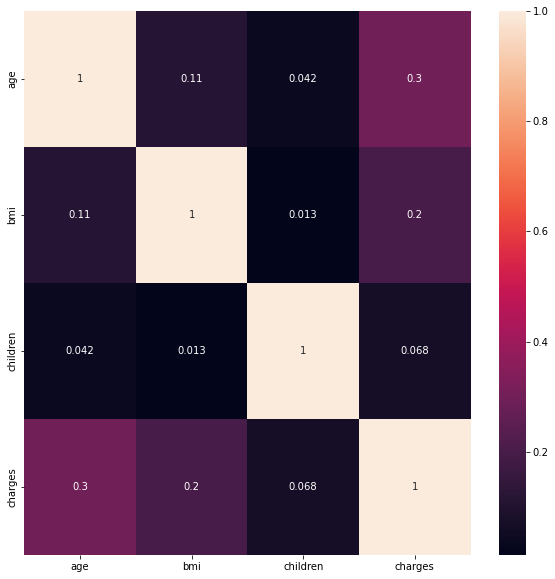

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

Istnieje korelacja między ceną ubezpieczenia a wiekiem i BMI. Przyjrzymy się temu dokładniej.

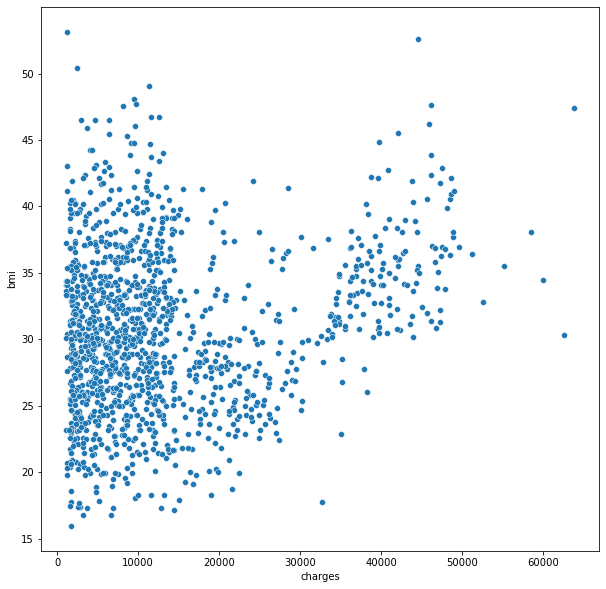

In [64]:
plt.figure(figsize=(10,10))

sns.scatterplot(x='charges', y='bmi', data=df);

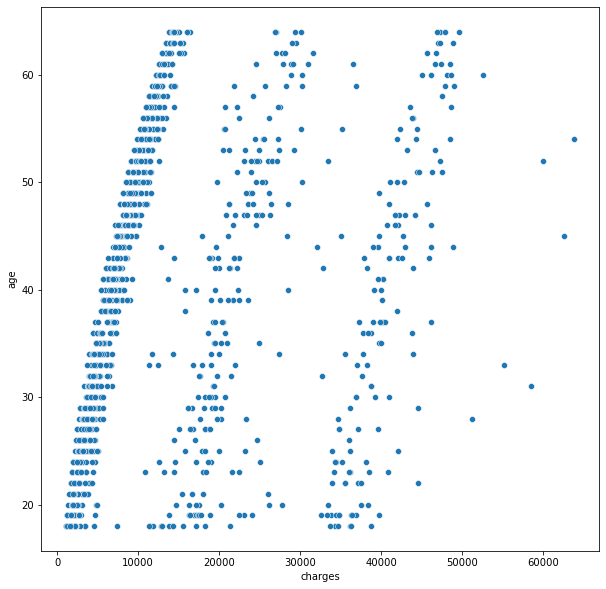

In [63]:
plt.figure(figsize=(10,10))

sns.scatterplot(x='charges', y='age', data=df);

Widać, że wraz z wiekiem zwiększają się składki. Podobnie jest z BMI.


Na zdrowie powinno też wpływać palenie papierosów.

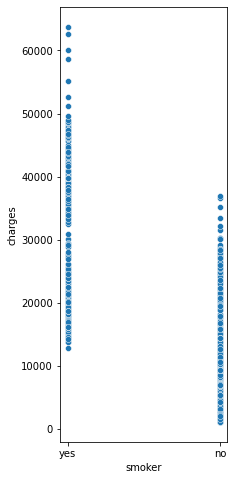

In [61]:
plt.figure(figsize=(3,8))

sns.scatterplot(x='smoker', y='charges', data=df);

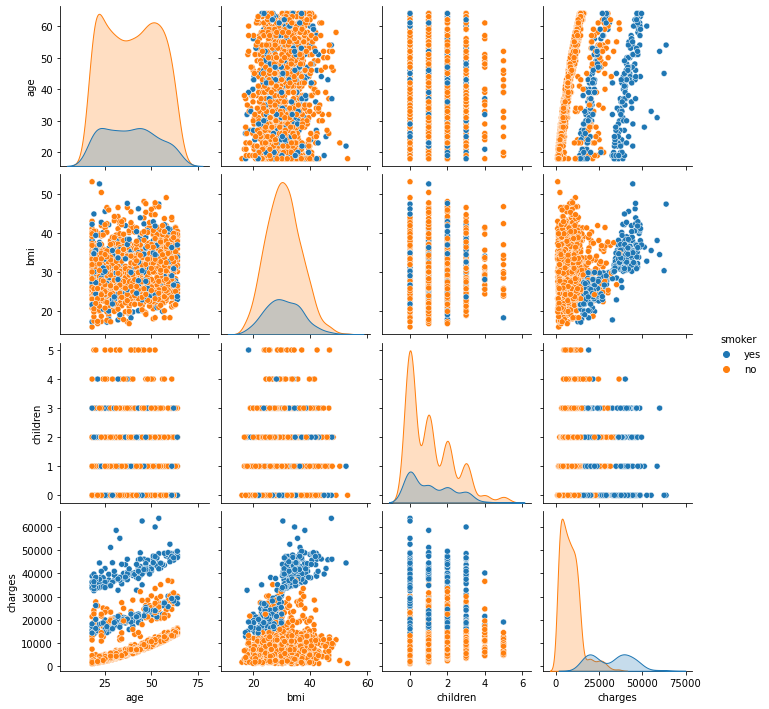

In [69]:
sns.pairplot(df, hue='smoker');

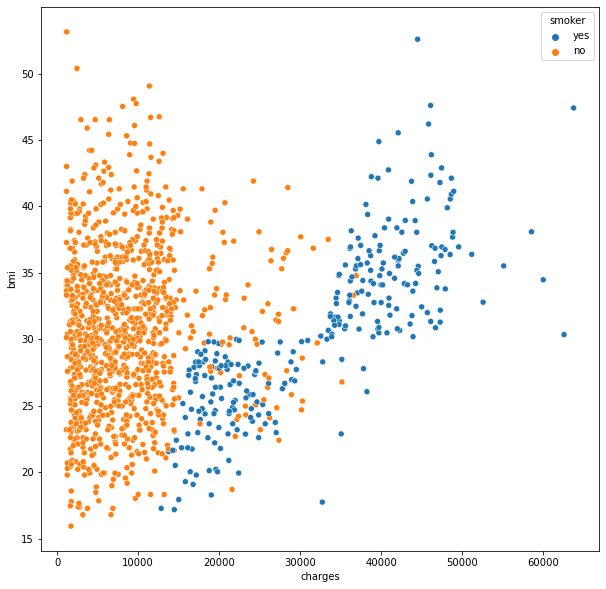

In [70]:
plt.figure(figsize=(10,10))

sns.scatterplot(x='charges', y='bmi', hue='smoker', data=df);

Składki dla palaczy są wyższe. Pozostaje jeszcze region.

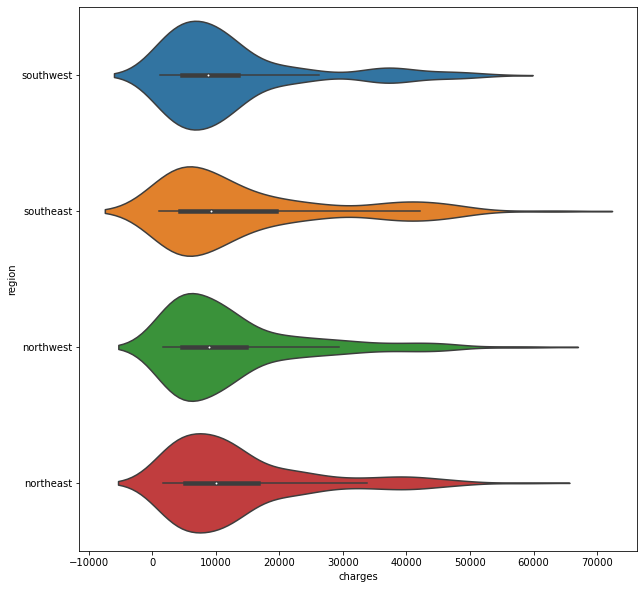

In [73]:
plt.figure(figsize=(10,10))

sns.violinplot(x='charges', y='region', data=df);

Miejsce zamieszkania nie ma wpływu na wysokość składek. Do modelowania można ją usunąć.

## Przygotowanie danych do ML

In [74]:
df_ml = df.drop(['region'], axis = 1)
df_ml.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [77]:
df_ml = pd.get_dummies(df_ml, drop_first = True)
df_ml.head()

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


In [96]:
X = df_ml.drop(['charges'], axis = 1)
y = df_ml.charges

In [97]:
X.head()

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0


In [98]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [89]:

X = sc.fit_transform(X)
X

array([[-1.43876426, -0.45332   , -0.90861367, -1.0105187 ,  1.97058663],
       [-1.50996545,  0.5096211 , -0.07876719,  0.98959079, -0.5074631 ],
       [-0.79795355,  0.38330685,  1.58092576,  0.98959079, -0.5074631 ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, -1.0105187 , -0.5074631 ],
       [-1.29636188, -0.79781341, -0.90861367, -1.0105187 , -0.5074631 ],
       [ 1.55168573, -0.26138796, -0.90861367, -1.0105187 ,  1.97058663]])

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X,y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modelowanie

### Regresja liniowa

In [103]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
print(f'R2 = {round(model.score(X_test, y_test), 2)}')

R2 = 0.75


### Las losowy

In [109]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=600, max_depth=5)
model.fit(X_train, y_train)

prediction = model.predict(X_test)
print(f'R2 = {round(model.score(X_test, y_test), 2)}')

R2 = 0.86


### Drzewo decyzyjne

In [106]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

prediction = model.predict(X_test)
print(f'R2 = {round(model.score(X_test, y_test), 2)}')

R2 = 0.85


### Regresja wielomianowa

In [114]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

model = PolynomialFeatures(degree = 3)
model.fit(X_train, y_train)

X_poly = model.fit_transform(X)
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)
y_pred = regressor_poly.predict(X_poly)
r2_score(y, y_pred)

print(f'R2 = {round(r2_score(y, y_pred), 2)}')

R2 = 0.62


 Największą dokładnością wykazuje się las losowy.